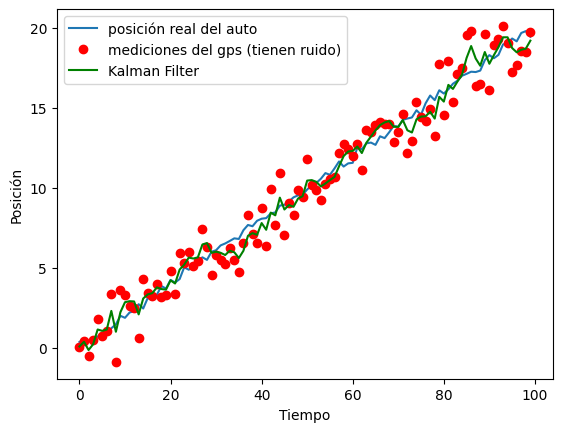

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# estado inicial
x_pos = 0
x_vel = 0.2
tiempo = 100

R = 1               # ruído de las mediciones
ruido_proceso = 0.2 # ruído del proceso

Q = np.array([[ruido_proceso,0],[0,0]])        
P = np.eye(2)   # matriz de covarianza inicial

# nuestro modelo:
x_hat = np.array([x_pos, x_vel])
F = np.array([[1, 1], [0, 1]]) # matriz de transición de estados
H = np.array([[1, 0]])         # matriz de observación

x = np.array([[x_vel * t + np.random.normal(0, ruido_proceso), x_vel] for t in range(tiempo)])  # estado real del sistema (esto en realidad no lo sabemos)

# mediciones del gps (tienen ruido)
mediciones = [i[0] + np.random.normal(0, R) for i in x]  # mediciones de un sensor con ruido (en este caso el gps)

#Kalman filter
Kalman_gains = []
kalman_filter = []
for z in mediciones:
    # Projection into K+1
    x_hat_tick_plus_one = F.dot(x_hat) 
    P_tick = F.dot(P).dot(F.T) + Q 

    #Kalman gain
    _s = H.dot(P_tick).dot(H.T) + R
    K = P_tick.dot(H.T).dot(np.linalg.inv(_s))
    #update estimate
    x_hat = x_hat_tick_plus_one + K.dot(z - H.dot(x_hat_tick_plus_one)) 
    #update covariance
    P = (np.eye(2) - K.dot(H)).dot(P_tick)
    Kalman_gains.append(K[0])
    kalman_filter.append(x_hat[0])

# Plot the results
plt.plot(x[:, 0], label='posición real del auto')
plt.plot(mediciones, 'ro', label='mediciones del gps (tienen ruido)')
plt.plot(kalman_filter[:], 'g-', label='Kalman Filter')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.show()